In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
cancer =  pd.read_csv('../../data/processed/cancer_metabolites_centralities.csv', sep=',')
healthy = pd.read_csv('../../data/processed/healthy_metabolites_centralities.csv', sep=',')

In [7]:
cancer = cancer[['shared name', 'Betweenness', 'Closeness', 'Eigenvector', 'Degree']]

In [8]:
healthy = healthy[['shared name', 'Betweenness', 'Closeness', 'Eigenvector', 'Degree']]

## Prostate cancer 3D scatter plot  

In [11]:
cancer.sort_values(by=['Betweenness', 'Closeness', 'Eigenvector'], ascending=False, inplace=True)
important = cancer.head(5)['shared name'].to_list()
important

['2-ketobutyric acid',
 'inosine',
 '4-acetamidobutanoate',
 'n-acetyl-l-glutamate 5-semialdehyde',
 'pyroglutamic acid']

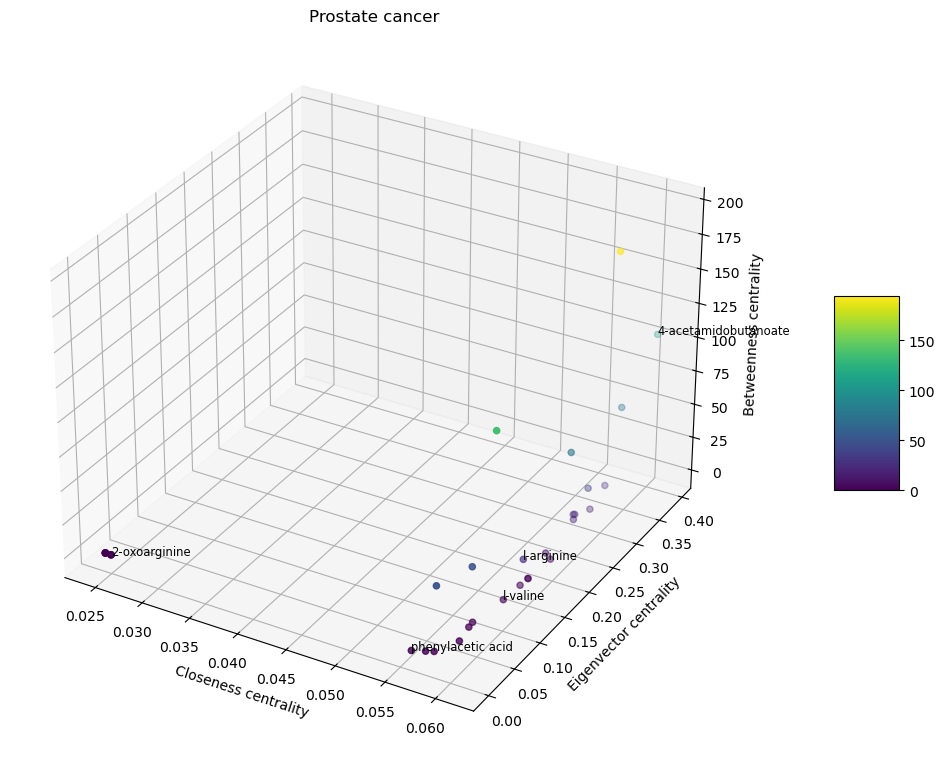

In [20]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(cancer['Closeness'], cancer['Eigenvector'], cancer['Betweenness'], c=cancer['Betweenness'], label=cancer['shared name'])
plt.title('Prostate cancer')
ax.set_xlabel('Closeness centrality')
ax.set_ylabel('Eigenvector centrality')
ax.set_zlabel('Betweenness centrality')
fig.colorbar(sctt, ax = ax, shrink = 0.2, aspect = 3, location='right', pad=0.1)
for x, y, z, label in zip(cancer['Closeness'], cancer['Eigenvector'], cancer['Betweenness'], cancer['shared name']):
    if label in important:
        ax.text(x, y, z, label, fontsize='small', rotation=45)
plt.tight_layout()

plt.savefig('../../assets/images/3d_scatter_cancer.png', bbox_inches='tight')

## Healthy 3D scatter plot

In [14]:
healthy.sort_values(by=['Betweenness', 'Closeness', 'Eigenvector'], ascending=False, inplace=True)
important = healthy.head(5)['shared name'].to_list()
important

['2-oxoarginine',
 '4-acetamidobutanoate',
 'l-arginine',
 'l-valine',
 'phenylacetic acid']

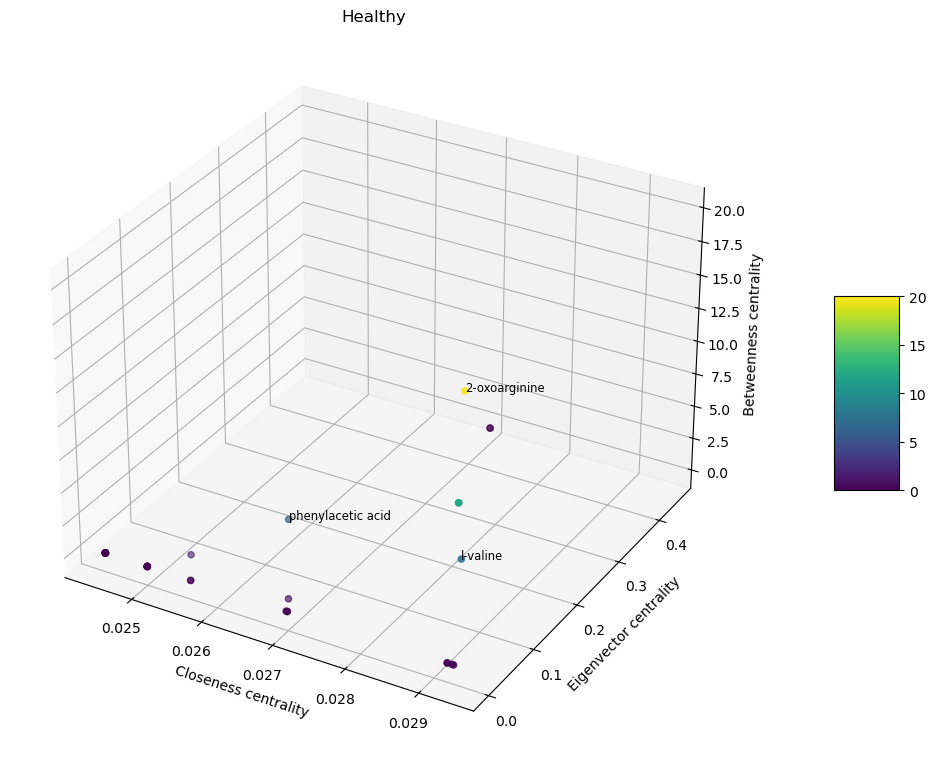

In [21]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(healthy['Closeness'], healthy['Eigenvector'], healthy['Betweenness'], c=healthy['Betweenness'], label=healthy['shared name'])
plt.title('Healthy')
ax.set_xlabel('Closeness centrality')
ax.set_ylabel('Eigenvector centrality')
ax.set_zlabel('Betweenness centrality')
fig.colorbar(sctt, ax = ax, shrink = 0.2, aspect = 3, location='right', pad=0.1)
for x, y, z, label in zip(healthy['Closeness'], healthy['Eigenvector'], healthy['Betweenness'], healthy['shared name']):
    if label in important:
        if label not in ['4-acetamidobutanoate', 'l-arginine']:
            ax.text(x, y, z, label, fontsize='small', rotation=45)
plt.tight_layout()

plt.savefig('../../assets/images/3d_scatter_healthy.png', bbox_inches='tight')